In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
plt.rcParams.update({'font.size': 18})



from root_numpy import root2array
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"

In [4]:
beam_OFF_cluster_track_file='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.1_v08_00_00_16_run1_reco2_cluster_track_hadd.root'
beam_OFF_correlations_file='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.1_v08_00_00_16_run1_reco2_correlations_hadd.root'
beam_OFF_skip_cluster_track_file='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.1_v08_00_00_16_run1_reco2_cluster_track_skip_hadd.root'
beam_OFF_skip_correlations_file='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.1_v08_00_00_16_run1_reco2_correlations_skip_hadd.root'


In [5]:
Cluster_tree_Beam_Off = uproot.open(beam_OFF_cluster_track_file)[folder][TREE_CLUSTER]
Matching_tree_Beam_Off = uproot.open(beam_OFF_cluster_track_file)[folder][TREE_MATCHING]

Sps_tree_Beam_Off=uproot.open(beam_OFF_correlations_file)[folder_corr][TREE_SPS]
Event_tree_Beam_Off=uproot.open(beam_OFF_correlations_file)[folder_corr][TREE_EVENT]

Cluster_tree_Beam_Off_skip = uproot.open(beam_OFF_skip_cluster_track_file)[folder][TREE_CLUSTER]
Matching_tree_Beam_Off_skip = uproot.open(beam_OFF_skip_cluster_track_file)[folder][TREE_MATCHING]

Sps_tree_Beam_Off_skip=uproot.open(beam_OFF_skip_correlations_file)[folder_corr][TREE_SPS]
Event_tree_Beam_Off_skip=uproot.open(beam_OFF_skip_correlations_file)[folder_corr][TREE_EVENT]


IOError: [Errno 2] No such file or directory: '/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.1_v08_00_00_16_run1_reco2_cluster_track_hadd.root'

In [6]:
CLEAN_REGION = 'Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)'
MATCH_CUT='Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0'

In [7]:
df_Matching_Beam_Off=Matching_tree_Beam_Off.pandas.df().query(CLEAN_REGION)
df_Cluster_Beam_Off=Cluster_tree_Beam_Off.pandas.df()

df_Sps_Correlation_Beam_Off=Sps_tree_Beam_Off.pandas.df()
df_Event_Correlation_Beam_Off=Event_tree_Beam_Off.pandas.df()


df_Matching_Beam_Off_skip=Matching_tree_Beam_Off_skip.pandas.df().query(CLEAN_REGION)
df_Cluster_Beam_Off_skip=Cluster_tree_Beam_Off_skip.pandas.df()

df_Sps_Correlation_Beam_Off_skip=Sps_tree_Beam_Off_skip.pandas.df()
df_Event_Correlation_Beam_Off_skip=Event_tree_Beam_Off_skip.pandas.df()

In [8]:
df_Matching_Beam_Off.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,Y_cluster_3d_hit_y,Z_reco_best3d,...,Y_reco_best3d,distance_smallest3d,Y_cluster_charge,V_cluster_charge,U_cluster_charge,YV_iou,YU_iou,deltaY,deltaY_smallest,Y_Wire
entry,,,,,,,,,,,,,,,,,,,,,
29,-1.000000,0,-1.0,0,6.000000,1.0,410.399999,67.818664,-9999.00000,-999.000000,...,-999.000000,9171.941475,62.359493,0.000000,0.0,-1.000000,-1.0,-9999.0,0.173205,1368
30,-1.000000,0,-1.0,0,6.550781,2.0,410.399999,161.325903,-9999.00000,-999.000000,...,-999.000000,9183.287241,241.407799,0.000000,0.0,-1.000000,-1.0,-9999.0,0.173205,1369
31,-1.000000,0,-1.0,0,6.000000,1.0,411.299999,206.521343,-9999.00000,-999.000000,...,-999.000000,9189.245224,33.455173,0.000000,0.0,-1.000000,-1.0,-9999.0,0.173205,1371
32,0.038049,1,-1.0,0,157.691406,13.0,418.799999,121.491796,-68.22543,425.240265,...,-16.586807,86.733750,3501.166931,92.319687,0.0,0.038049,-1.0,-9999.0,0.173205,1400
33,-1.000000,0,-1.0,0,24.488525,11.0,422.999999,73.243678,-9999.00000,-999.000000,...,-999.000000,9174.518543,1096.147160,0.000000,0.0,-1.000000,-1.0,-9999.0,0.173205,1420


In [9]:
df_Cluster_Beam_Off.head()

,cluster_hit_z,cluster_hit_x,Z_reco_best,X_reco_best,distance_smallest,plane
entry,,,,,,
0,27.9,50.526348,26.224133,72.391098,25.737999,0
1,29.7,50.332589,26.090813,72.783157,27.100207,0
2,39.3,111.461529,21.185270,98.002861,16.736506,0
3,58.8,56.700412,22.821905,88.578293,39.037290,0
4,66.6,120.648191,20.047161,105.168503,16.971357,0


In [10]:
df_Sps_Correlation_Beam_Off.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
entry,,,,,,,,,,,,,,,,,,,,,
0,1455217481,56.606850,51.545883,4.094968,8.409945e-316,8.413673e-316,857,4967,17,-9999.0,...,0,0.0,2.983364e-42,0.0,0.0,65.492066,122.649372,0,447.813179,70.107605
1,1455217481,111.411484,75.967796,6.900000,8.409945e-316,8.413673e-316,857,4967,17,-9999.0,...,0,0.0,2.983364e-42,0.0,0.0,65.492066,122.649372,0,428.216424,59.263844
2,1455217481,50.423420,104.027023,35.280495,8.409945e-316,8.413673e-316,857,4967,17,-9999.0,...,0,0.0,2.983364e-42,0.0,0.0,65.492066,122.649372,0,441.753408,26.684086
3,1455217481,120.628059,107.144714,115.913071,8.409945e-316,8.413673e-316,857,4967,17,-9999.0,...,0,0.0,2.983364e-42,0.0,0.0,65.492066,122.649372,0,347.187662,102.236783
4,1455217481,186.465897,-112.825737,114.599998,8.409945e-316,8.413673e-316,857,4967,17,-9999.0,...,0,0.0,2.983364e-42,0.0,0.0,65.492066,122.649372,0,284.288398,111.326574


In [11]:
df_Event_Correlation_Beam_Off.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
entry,,,,,,,,,,,,,,,,,,,,,
0,1455217481,-9999.000000,-9999.000000,-9999.000000,255.933888,-78.204909,291.096339,1.000000e+10,45,0.00000,...,0,0.0,2.983364e-42,0.0,0.0,65.492066,122.649372,0,4967,17
1,1455217651,-9999.000000,-9999.000000,-9999.000000,242.483477,-62.255682,499.522823,1.000000e+10,59,0.00000,...,0,0.0,2.983364e-42,0.0,0.0,265.642393,50.064013,0,4967,18
2,1455217671,-9999.000000,-9999.000000,-9999.000000,245.114101,56.678840,556.244968,1.000000e+10,56,0.00000,...,0,0.0,2.983364e-42,0.0,0.0,64.031017,87.896373,0,4967,18
3,1455217716,-9999.000000,-9999.000000,-9999.000000,189.427963,60.306961,678.395713,1.000000e+10,50,0.00000,...,0,0.0,2.983364e-42,0.0,0.0,330.733056,121.873789,0,4967,18
4,1455217727,54.050934,28.105213,348.180359,80.803231,70.621499,535.262279,1.020505e+02,60,234.55246,...,0,0.0,2.983364e-42,0.0,0.0,108.366102,115.202119,0,4967,19


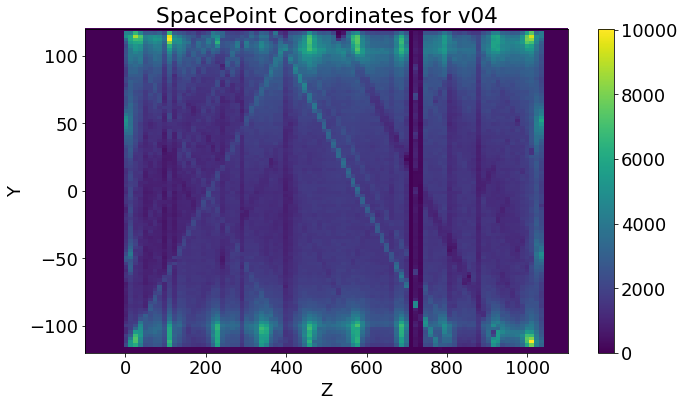

In [12]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_Correlation_Beam_Off['sps_z'].values,df_Sps_Correlation_Beam_Off['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates for v04")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

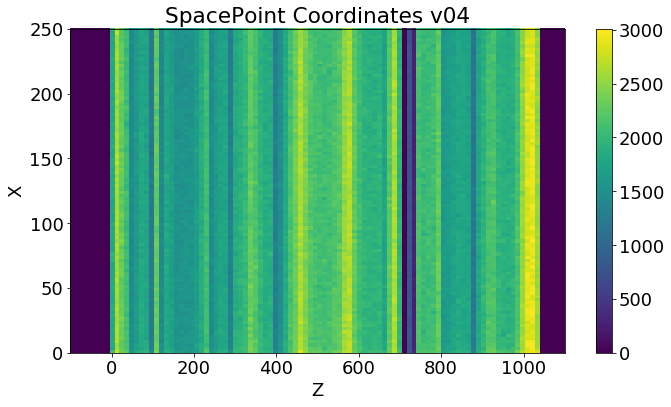

In [13]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_Correlation_Beam_Off['sps_z'].values,df_Sps_Correlation_Beam_Off['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates v04")
plt.xlabel('Z')
plt.ylabel('X')

plt.tight_layout()
plt.show()

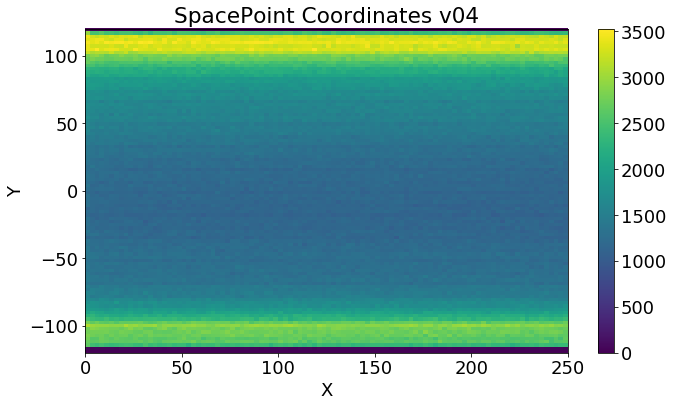

In [14]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_Correlation_Beam_Off['sps_x'].values,df_Sps_Correlation_Beam_Off['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates v04")
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


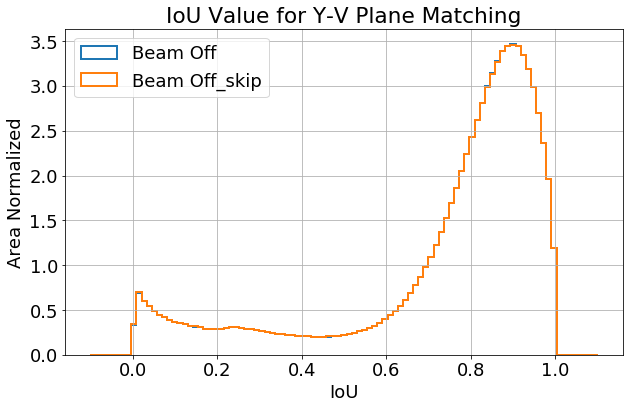

In [15]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)
plt.hist(df_Matching_Beam_Off['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Beam Off',normed='True')
plt.hist(df_Matching_Beam_Off_skip['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Beam Off_skip',normed='True')


plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

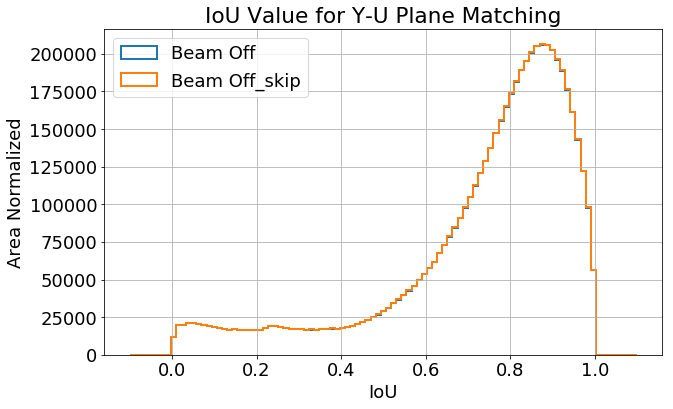

In [16]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)
plt.hist(df_Matching_Beam_Off['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Beam Off')
plt.hist(df_Matching_Beam_Off_skip['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Beam Off_skip')


plt.title("IoU Value for Y-U Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

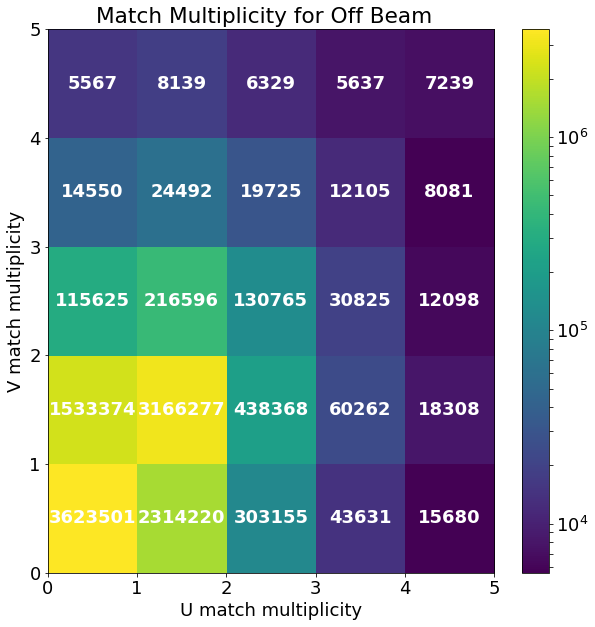

In [17]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_Beam_Off['U_match_multiplicity'].values,df_Matching_Beam_Off['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.title('Match Multiplicity for Off Beam  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()



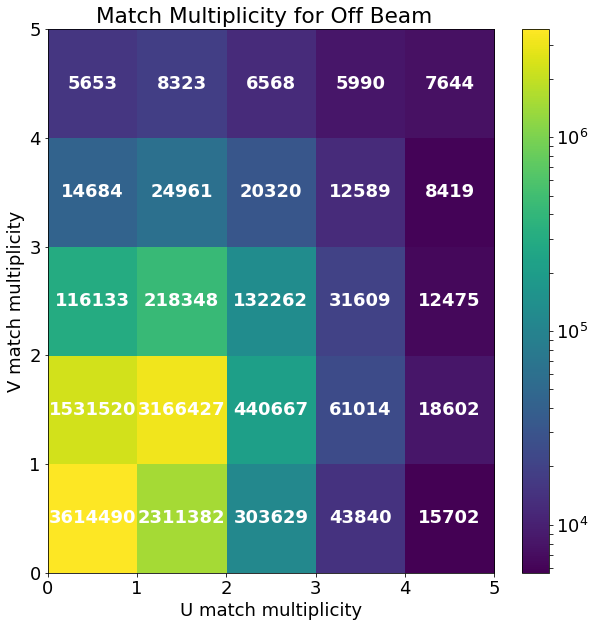

In [18]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_Beam_Off_skip['U_match_multiplicity'].values,df_Matching_Beam_Off_skip['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.title('Match Multiplicity for Off Beam  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()



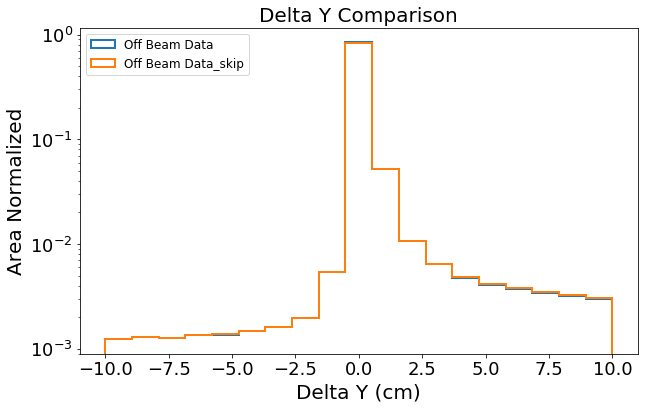

In [19]:
fig = plt.figure(figsize=(10,6))

BINS=np.linspace(-10,10,20)
plt.hist(df_Matching_Beam_Off['deltaY'].values, bins=BINS,histtype='step',lw=2,label='Off Beam Data',normed='True')
plt.hist(df_Matching_Beam_Off_skip['deltaY'].values, bins=BINS,histtype='step',lw=2,label='Off Beam Data_skip',normed='True')

plt.yscale('log')
plt.legend(loc=2,prop={'size': 12})
plt.xlabel("Delta Y (cm)",fontsize=20)
plt.ylabel('Area Normalized',fontsize=20)
plt.title('Delta Y Comparison',fontsize=20)

plt.show()
#fig.savefig('deltaY_Comparison.png', dpi=500)

In [20]:
df_Matching_Off_Beam_match=df_Matching_Beam_Off.query(MATCH_CUT)
df_Matching_Off_Beam_match_skip=df_Matching_Beam_Off_skip.query(MATCH_CUT)


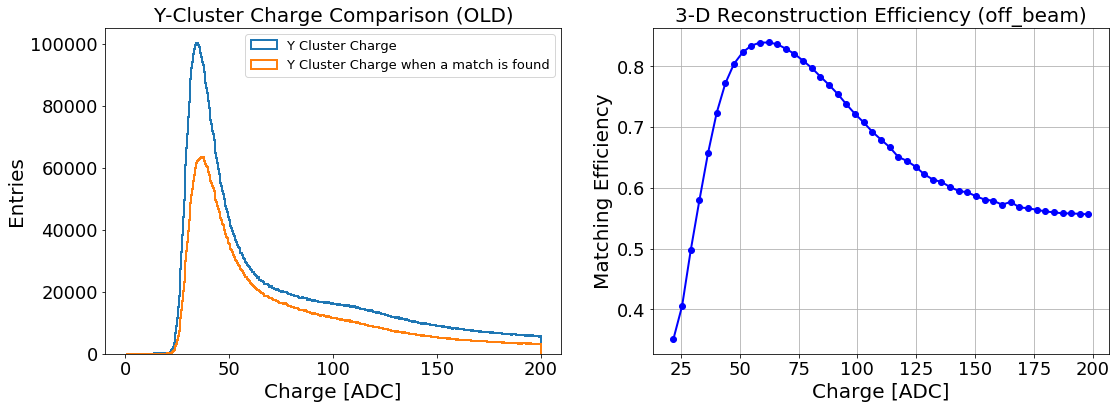

In [21]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_Beam_Off['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_Off_Beam_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (OLD)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_off_beam, bins2D_off_beam = np.histogram(df_Matching_Beam_Off['Y_cluster_charge'].values,bins=BINS)
vals3D_off_beam, bins3D_off_beam = np.histogram(df_Matching_Off_Beam_match['Y_cluster_charge'].values,bins=BINS)
binC_off_beam = 0.5*(bins2D_off_beam[1:]+bins2D_off_beam[:-1])
vals2D_off_beam = vals2D_off_beam.astype(float)
#print vals2D
vals3D_off_beam = vals3D_off_beam.astype(float)
ratio_v_off_beam = []
for i,v in enumerate(vals2D_off_beam):
    if (v == 0):
        ratio_v_off_beam.append(0.)
    else:
        ratio_v_off_beam.append(vals3D_off_beam[i]/v)
#print ratio_v
plt.plot(binC_off_beam,ratio_v_off_beam,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (off_beam)',fontsize=20)

plt.show()



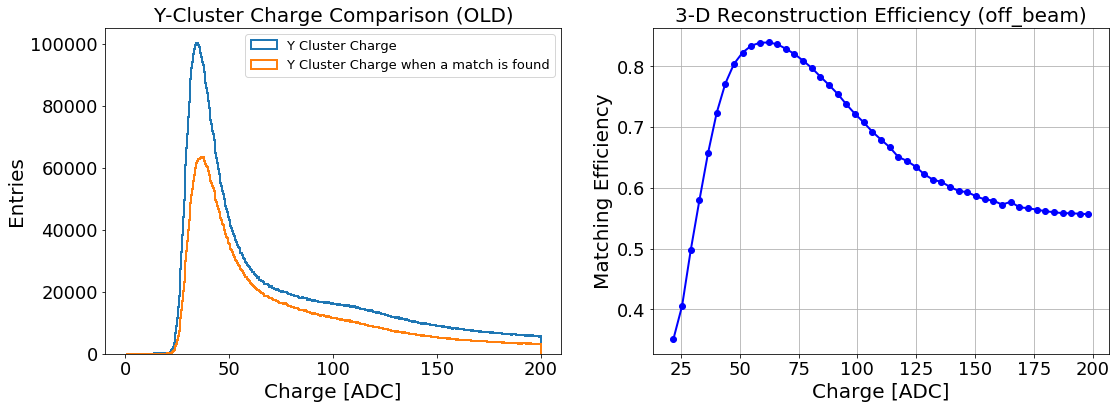

In [22]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_Beam_Off_skip['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_Off_Beam_match_skip['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (OLD)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_off_beam_skip, bins2D_off_beam_skip = np.histogram(df_Matching_Beam_Off_skip['Y_cluster_charge'].values,bins=BINS)
vals3D_off_beam_skip, bins3D_off_beam_skip = np.histogram(df_Matching_Off_Beam_match_skip['Y_cluster_charge'].values,bins=BINS)
binC_off_beam_skip = 0.5*(bins2D_off_beam_skip[1:]+bins2D_off_beam_skip[:-1])
vals2D_off_beam_skip = vals2D_off_beam_skip.astype(float)
#print vals2D
vals3D_off_beam_skip = vals3D_off_beam_skip.astype(float)
ratio_v_off_beam_skip = []
for i,v in enumerate(vals2D_off_beam_skip):
    if (v == 0):
        ratio_v_off_beam_skip.append(0.)
    else:
        ratio_v_off_beam_skip.append(vals3D_off_beam_skip[i]/v)
#print ratio_v
plt.plot(binC_off_beam_skip,ratio_v_off_beam_skip,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (off_beam)',fontsize=20)

plt.show()



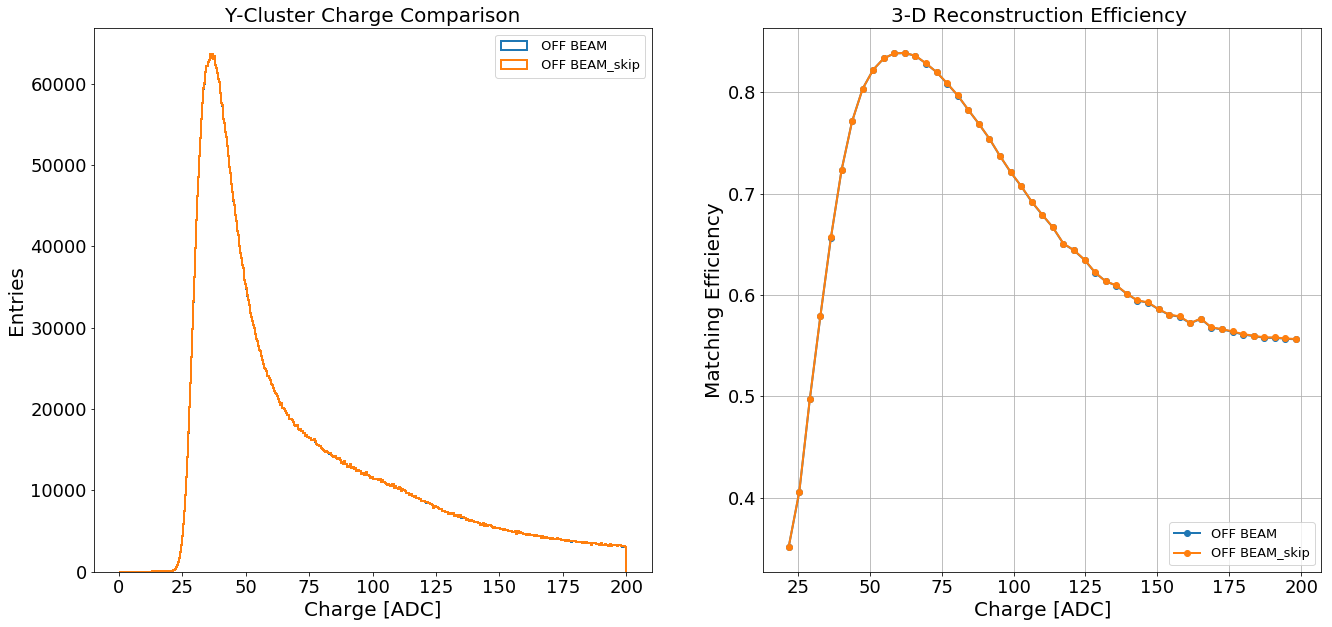

In [23]:
fig = plt.figure(figsize=(22,10))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)


plt.hist(df_Matching_Off_Beam_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label=' OFF BEAM')
plt.hist(df_Matching_Off_Beam_match_skip['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label=' OFF BEAM_skip')

plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)#
plt.title('Y-Cluster Charge Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)


plt.plot(binC_off_beam,ratio_v_off_beam,'o-',lw=2,label='OFF BEAM')
plt.plot(binC_off_beam_skip,ratio_v_off_beam_skip,'o-',lw=2,label='OFF BEAM_skip')

plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency ',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()


In [24]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

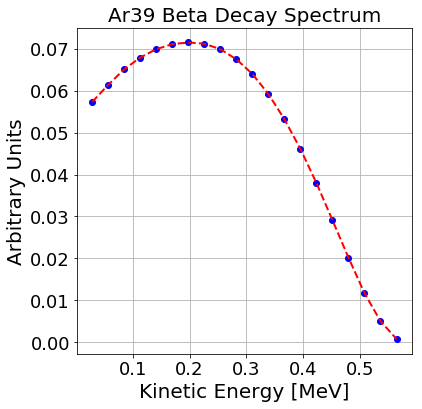

In [25]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

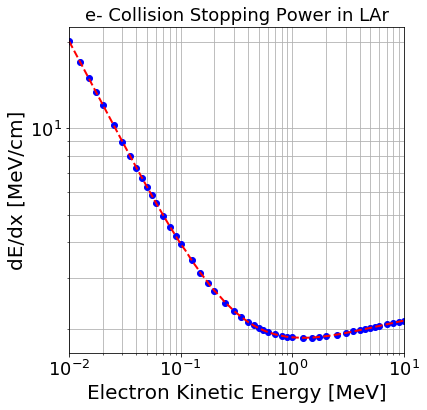

In [26]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

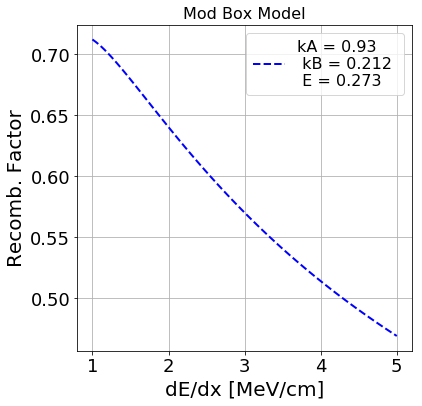

In [27]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

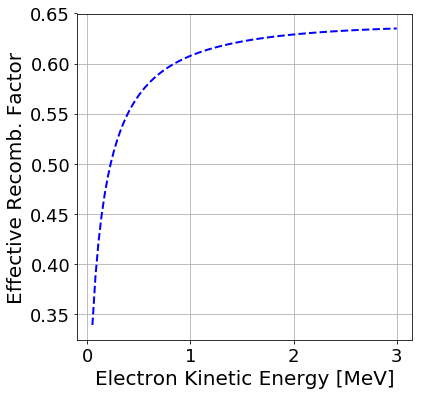

In [28]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



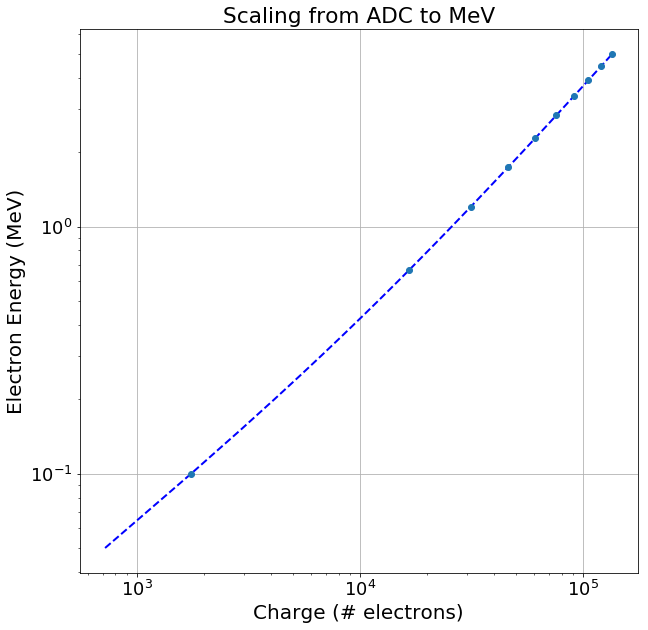

In [29]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [30]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.237411884189


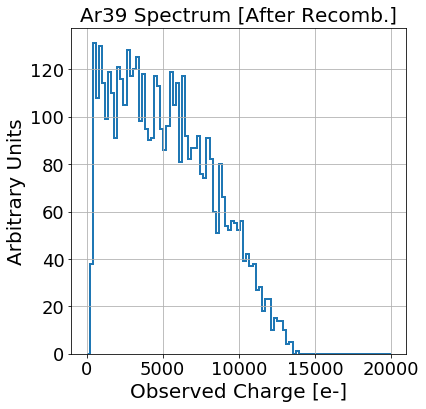

In [31]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [32]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

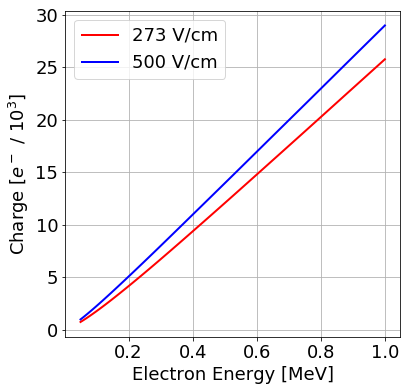

In [33]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [34]:
def E_recoY_beam_off(df,gain):
    YQ_beam_off = df['Y_cluster_charge']
    QrecoY_beam_off = YQ_beam_off * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_beam_off = fQ2E(QrecoY_beam_off)
    return ErecoY_beam_off


def E_reco_simple(YQ,gain):
    #YQ = df['Y_cluster_charge']
    Qreco = YQ * gain * (23.6/1e6) # MeV w/ no recomb factor
    E_r=0.01 # MeV
    while E_r<10:
        Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
        Q_hypo=Eff_Recomb*E_r # MeV
        if Q_hypo>Qreco:
            return E_r
        E_r+=0.01

In [35]:
dfcut_match_old = df_Matching_Off_Beam_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_old   = df_Matching_Beam_Off.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_old['energy'] = E_recoY_beam_off(dfcut_match_old,238.4)
dfcut_all_old['energy']   = E_recoY_beam_off(dfcut_all_old,238.4)

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


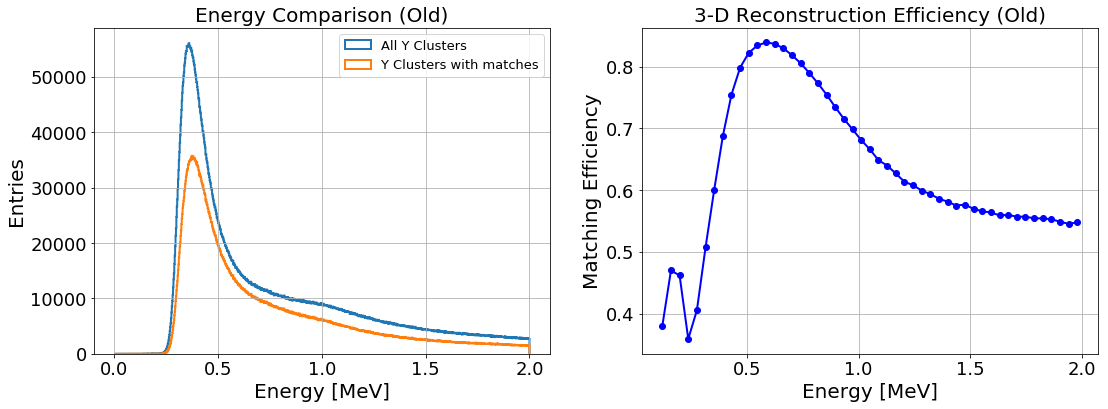

7468940


In [36]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_old['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_old['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (Old)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_old, bins2D_old = np.histogram(dfcut_all_old['energy'].values,bins=BINS)
vals3D_old, bins3D_old = np.histogram(dfcut_match_old['energy'].values,bins=BINS)
binC_old = 0.5*(bins2D_old[1:]+bins2D_old[:-1])
vals2D_old = vals2D_old.astype(float)
#print vals2D
vals3D_old = vals3D_old.astype(float)
ratio_v_old = []
for i,v in enumerate(vals2D_old):
    if (v == 0):
        ratio_v_old.append(0.)
    else:
        ratio_v_old.append(vals3D_old[i]/v)
#print ratio_v
plt.plot(binC_old,ratio_v_old,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (Old)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_old.shape[0]

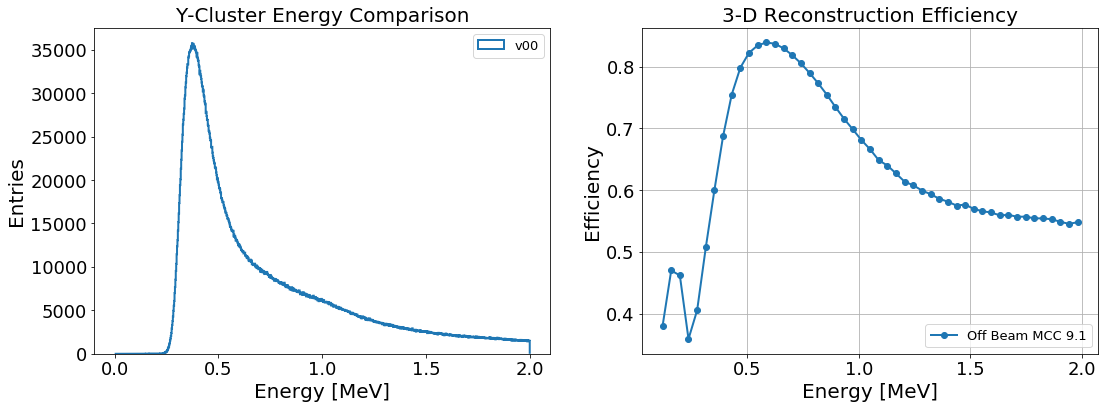

In [37]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)

plt.hist(dfcut_match_old['energy'].values, bins=BINS,histtype='step',lw=2,label='v00')



plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)


plt.subplot(1, 2, 2)

plt.plot(binC_old,ratio_v_old,'o-',lw=2,label='Off Beam MCC 9.1')

plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()
fig.savefig('Threshold_Comparison.png', dpi=300)



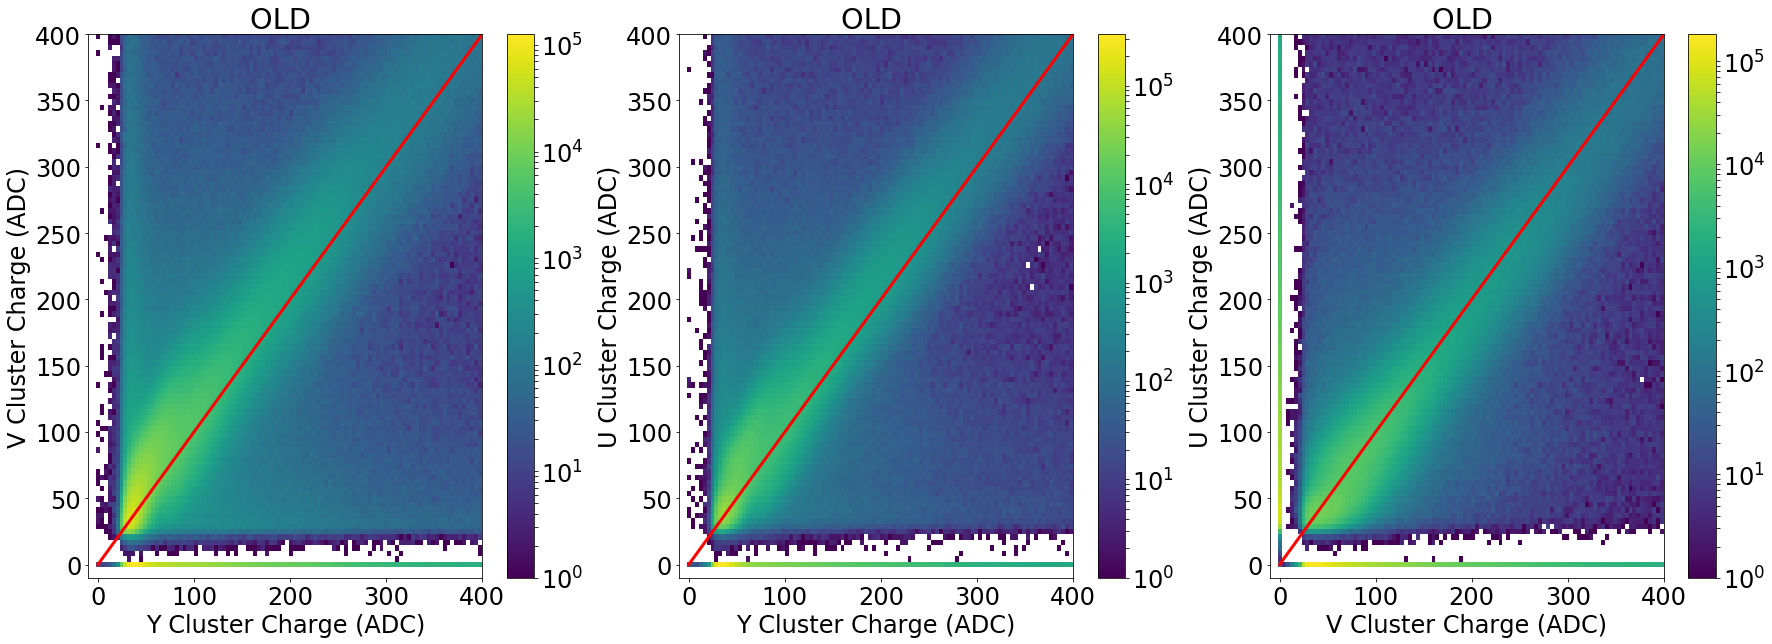

In [38]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_Off_Beam_match['Y_cluster_charge'].values,df_Matching_Off_Beam_match['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('OLD ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_Off_Beam_match['Y_cluster_charge'].values,df_Matching_Off_Beam_match['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('OLD ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_Off_Beam_match['V_cluster_charge'].values,df_Matching_Off_Beam_match['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('OLD ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



In [39]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >0.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>0. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >0. '

dfChargeCut_old = df_Matching_old.query(CUT)

dfChargeCut_old['energyY_old'] = E_recoY_old(dfChargeCut_old,238.4)
dfChargeCut_old['energyU_old'] = E_recoU_old(dfChargeCut_old,232)
dfChargeCut_old['energyV_old'] = E_recoV_old(dfChargeCut_old,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_old['energyY_old'].values,dfChargeCut_old['energyV_old'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v_old')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_old['energyY_old'].values,dfChargeCut_old['energyU_old'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v_old ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_old['energyV_old'].values,dfChargeCut_old['energyU_old'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v_old ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=270)



NameError: name 'df_Matching_old' is not defined

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.hist2d(df_Correlation_v04_G10['distance_nu_smallest'].values,df_Correlation_v04_G10['sps_cluster_charge'].values, bins=(50,40), range=[[0,500], [0,200]] , norm=LogNorm())
plt.colorbar()
plt.ylabel('SpacePoint Charge (ADC)')
plt.xlabel('Distance from the Vertex(cm)')
plt.title('SpacePoint Distance vs ADC')
plt.show()